In [17]:
n = 6
m = 10
k = 3 # 3-SAT
ret_num = 3

In [18]:
from benchmark.weighted_problem import WeightedProblem
problem = WeightedProblem(n, m, k)

In [19]:
for (c, w) in problem.formula.weighted_clauses:
    print(f'Clause: {c}, weight: {w}')

Clause: (x5 ∨ ¬x5 ∨ ¬x1), weight: 7.6274672663845555
Clause: (x0 ∨ ¬x2 ∨ x4), weight: 3.174768887671926
Clause: (x2 ∨ x3 ∨ ¬x0), weight: 7.61807862692322
Clause: (¬x4 ∨ ¬x3 ∨ x1), weight: 4.049281425356841
Clause: (¬x2 ∨ ¬x4 ∨ ¬x3), weight: 0.15635762841468503
Clause: (x4 ∨ ¬x5 ∨ ¬x4), weight: 2.1809087795850557
Clause: (¬x3 ∨ x5 ∨ ¬x0), weight: 9.92030896120992
Clause: (x0 ∨ x3 ∨ ¬x1), weight: 0.20464671906361476
Clause: (x1 ∨ ¬x5 ∨ x2), weight: 3.535749791570064
Clause: (x0 ∨ ¬x2 ∨ ¬x3), weight: 2.6641938559262224


In [20]:
from max_3_sat.quantum_solver import QuantumSolver

quantum_solver = QuantumSolver(problem.formula)
q_max_sats = quantum_solver.max_sat(ret_num=ret_num)


In [21]:
q_max_sats

{'101010': 41.13176194210611,
 '101000': 41.13176194210611,
 '101101': 41.13176194210611}

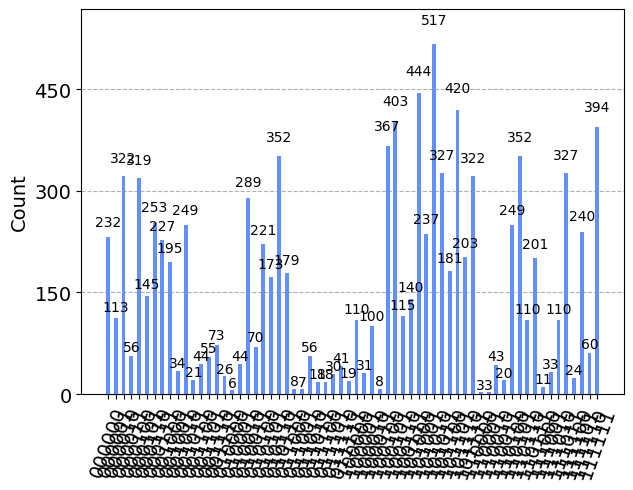

In [22]:
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

plot_histogram(quantum_solver.circuit_result)

In [23]:
from max_3_sat.classical_solver import ClassicalSolver

classical_solver = ClassicalSolver(problem.formula.to_pysat(), weight_func = problem.formula.assignment_weight)
c_max_sats = classical_solver.max_sat(ret_num=ret_num)


In [24]:
c_max_sats

{'000000': 41.13176194210611,
 '101000': 41.13176194210611,
 '111000': 41.13176194210611}

In [25]:
ratio = list(q_max_sats.values())[0] / list(c_max_sats.values())[0]
ratio

1.0

[]

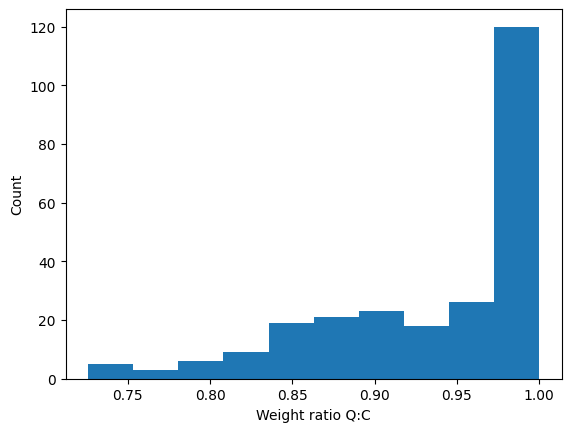

In [26]:
num_variables = 7
num_clauses = 10
vars_per_clause = 3

ratios = []

for _ in range(250):
    # Randomly generated problem instance
    problem = WeightedProblem(num_variables, num_clauses, vars_per_clause)

    # Initialise solvers
    quantum_solver = QuantumSolver(problem.formula)
    classical_solver = ClassicalSolver(problem.formula.to_pysat(), weight_func = problem.formula.assignment_weight)

    # Calculate ratio between solutions
    ratios.append(problem.weight_ratio(quantum_solver, classical_solver))

# Plot
plt.hist(ratios)
plt.xlabel("Weight ratio Q:C")
plt.ylabel("Count")
plt.plot()


[]

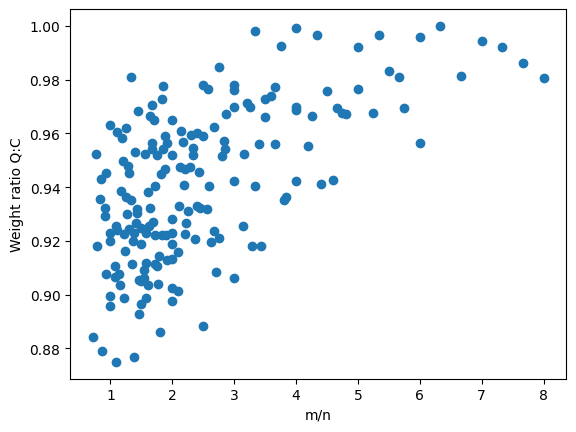

In [29]:
k = 3
instances = 10

# Benchmark over 3 to 10 variable instances
for n in range(3, 15):
    # Benchmark over 10 to 20 clause instances
    for m in range(10, 25):
        # Generate random instances
        ratio = 0
        for i in range(instances):
            # Randomly generated problem instance
            problem = WeightedProblem(n, m, k)

            # Initialise solvers
            quantum_solver = QuantumSolver(problem.formula)
            classical_solver = ClassicalSolver(problem.formula.to_pysat(), weight_func =            
            problem.formula.assignment_weight)

            # Update ratio
            ratio += problem.weight_ratio(quantum_solver, classical_solver)

        # Calculate ratio between solutions
        plt.scatter(x = m / n, y = ratio / instances, c='#1f77b4')

plt.xlabel("m/n")
plt.ylabel("Weight ratio Q:C")
plt.plot()
            